In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv(r"train.csv")
test=pd.read_csv(r"test.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data=[train,test]

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# reindexing, making passenger ID as the index
for x in data:
    x.index=x['PassengerId']
    x.drop(['PassengerId'],axis=1,inplace=True)

In [9]:
pd.DataFrame({"total":train.isnull().sum().sort_values(ascending=False),"percentage":train.isnull().sum().sort_values(ascending=False)/train.shape[0]*100})

,total,percentage
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [10]:
pd.DataFrame({"total":test.isnull().sum().sort_values(ascending=False),"percentage":test.isnull().sum().sort_values(ascending=False)/test.shape[0]*100})

,total,percentage
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [11]:
# In Both train and test Cabin Feature is having missing values,but..........

In [12]:
for data in data:
    data['Deck']=data.Cabin.astype(str).str[0]
    data['Deck']=data.Deck.map({'n':8,'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':np.nan})

In [13]:
train.dropna(subset=['Deck'],inplace=True)

In [14]:
train['Deck'].isnull().sum()

0

In [15]:
test['Deck'].isnull().sum()

0

In [16]:
train.drop(['Cabin'],axis=1,inplace=True)
test.drop(['Cabin'],axis=1,inplace=True)

In [17]:
test.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
Deck         0
dtype: int64

In [18]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
Deck          0
dtype: int64

In [19]:
# train data
pd.DataFrame({"total":train.isnull().sum().sort_values(ascending=False),"percentage":train.isnull().sum().sort_values(ascending=False)/train.shape[0]*100})

,total,percentage
Age,177,19.887640
Embarked,2,0.224719
Deck,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [20]:
# Test Data
pd.DataFrame({"total":test.isnull().sum().sort_values(ascending=False),"percentage":test.isnull().sum().sort_values(ascending=False)/test.shape[0]*100})

,total,percentage
Age,86,20.574163
Fare,1,0.239234
Deck,0,0.000000
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [21]:
# Train Data
train_mean = train['Age'].mean()
train_std  = train['Age'].std()
null       = train['Age'].isnull().sum()
random_age = np.random.randint(train_mean-train_std,train_mean+train_std,size=null)
random_age = list(random_age)
train.Age[np.isnan(train['Age'])] = random_age


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
# Test Data
test_mean = test['Age'].mean()
test_std  = test['Age'].std()
null       = test['Age'].isnull().sum()
random_age = np.random.randint(test_mean-test_std,test_mean+test_std,size=null)
random_age = list(random_age)
test.Age[np.isnan(test['Age'])] = random_age


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [23]:
# train data
pd.DataFrame({"total":train.isnull().sum().sort_values(ascending=False),"percentage":train.isnull().sum().sort_values(ascending=False)/train.shape[0]*100})

,total,percentage
Embarked,2,0.224719
Deck,0,0.000000
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [24]:
# Test Data
pd.DataFrame({"total":test.isnull().sum().sort_values(ascending=False),"percentage":test.isnull().sum().sort_values(ascending=False)/test.shape[0]*100})

,total,percentage
Fare,1,0.239234
Deck,0,0.000000
Embarked,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Age,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [25]:
# Embarked is having two null values.

In [26]:
train.Embarked.describe()

count     888
unique      3
top         S
freq      643
Name: Embarked, dtype: object

In [27]:
train.Embarked.fillna("S",inplace=True)

In [28]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Deck        float64
dtype: object

In [29]:
# Fare column in test data is having missing values, imputing mean to that missing value.

In [30]:
from sklearn.preprocessing import Imputer

imp_mean = Imputer(missing_values=np.nan,strategy='mean')

test['Fare'] = imp_mean.fit_transform(test[['Fare']])

In [31]:
# train data
pd.DataFrame({"total":train.isnull().sum().sort_values(ascending=False),"percentage":train.isnull().sum().sort_values(ascending=False)/train.shape[0]*100})

,total,percentage
Deck,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


In [32]:
# Test Data
pd.DataFrame({"total":test.isnull().sum().sort_values(ascending=False),"percentage":test.isnull().sum().sort_values(ascending=False)/test.shape[0]*100})

,total,percentage
Deck,0,0.0
Embarked,0,0.0
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0
SibSp,0,0.0
Age,0,0.0
Sex,0,0.0
Name,0,0.0
Pclass,0,0.0


HANDLING MISSING VALUES SUCCESSFULL ! 

In [33]:
train.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Deck        float64
dtype: object

In [34]:
test.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
Deck        float64
dtype: object

In [35]:
train.drop(['Name','Ticket'],axis=1,inplace=True)
test.drop(['Name','Ticket'],axis=1,inplace=True)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,8.0
2,1,1,female,38.0,1,0,71.2833,C,3.0
3,1,3,female,26.0,0,0,7.9250,S,8.0
4,1,1,female,35.0,1,0,53.1000,S,3.0
5,0,3,male,35.0,0,0,8.0500,S,8.0


C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


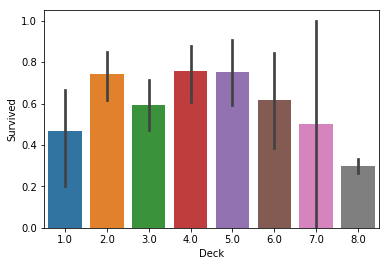

In [37]:
sns.barplot(train['Deck'],train['Survived'],data=train)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


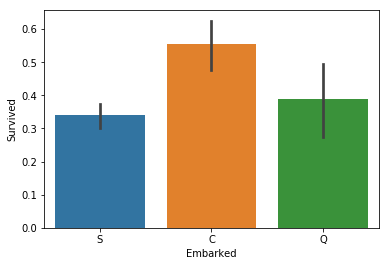

In [38]:
sns.barplot(train['Embarked'],train['Survived'],data=train)

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


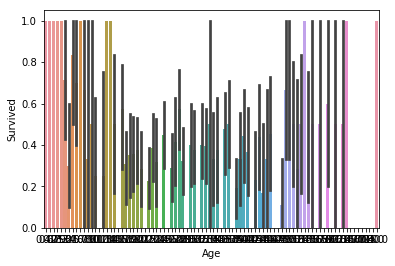

In [39]:
sns.barplot(train['Age'],train['Survived'])

# Family _size

In [40]:
train['Family_size'] = train['SibSp']+ train['Parch']
test['Family_size'] = test['SibSp']+ test['Parch']

In [41]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,8.0,1
2,1,1,female,38.0,1,0,71.2833,C,3.0,1
3,1,3,female,26.0,0,0,7.9250,S,8.0,0
4,1,1,female,35.0,1,0,53.1000,S,3.0,1
5,0,3,male,35.0,0,0,8.0500,S,8.0,0


In [42]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,8.0,0
893,3,female,47.0,1,0,7.0000,S,8.0,1
894,2,male,62.0,0,0,9.6875,Q,8.0,0
895,3,male,27.0,0,0,8.6625,S,8.0,0
896,3,female,22.0,1,1,12.2875,S,8.0,2


In [43]:
train['Family_size'].value_counts()

0     536
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family_size, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


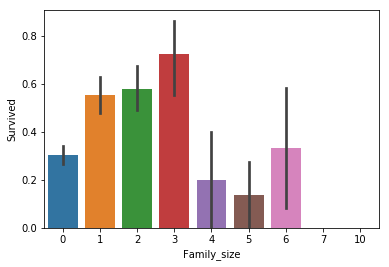

In [44]:
sns.barplot(train['Family_size'],train['Survived'])

In [45]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,8.0,1
2,1,1,female,38.0,1,0,71.2833,C,3.0,1
3,1,3,female,26.0,0,0,7.9250,S,8.0,0
4,1,1,female,35.0,1,0,53.1000,S,3.0,1
5,0,3,male,35.0,0,0,8.0500,S,8.0,0


In [46]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Family_size
PassengerId,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,8.0,0
893,3,female,47.0,1,0,7.0000,S,8.0,1
894,2,male,62.0,0,0,9.6875,Q,8.0,0
895,3,male,27.0,0,0,8.6625,S,8.0,0
896,3,female,22.0,1,1,12.2875,S,8.0,2


In [49]:
a = pd.get_dummies(train['Sex'],prefix='Sex')
train = train.join(a)
train.drop(['Sex'],axis=1,inplace=True)
    
b = pd.get_dummies(train['Embarked'],prefix='Embarked')
train = train.join(b)
train.drop(['Embarked'],axis=1,inplace=True)


In [50]:
a = pd.get_dummies(test['Sex'],prefix='Sex')
test = test.join(a)
test.drop(['Sex'],axis=1,inplace=True)
    
b = pd.get_dummies(test['Embarked'],prefix='Embarked')
test = test.join(b)
test.drop(['Embarked'],axis=1,inplace=True)


In [51]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Deck,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,8.0,1,0,1,0,0,1
2,1,1,38.0,1,0,71.2833,3.0,1,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,8.0,0,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,3.0,1,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,8.0,0,0,1,0,0,1


In [53]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Deck,Family_size,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
892,3,34.5,0,0,7.8292,8.0,0,0,1,0,1,0
893,3,47.0,1,0,7.0000,8.0,1,1,0,0,0,1
894,2,62.0,0,0,9.6875,8.0,0,0,1,0,1,0
895,3,27.0,0,0,8.6625,8.0,0,0,1,0,0,1
896,3,22.0,1,1,12.2875,8.0,2,1,0,0,0,1


# model 

In [64]:
test_y = pd.read_csv(r"gender_submission.csv")


In [65]:
test_y.index = test_y['PassengerId']
test_y.drop(['PassengerId'],axis=1,inplace=True)
test_y.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [66]:
X_train = train.drop(['Survived'],axis=1)
X_test  = test

y_train = train['Survived']
y_test  = test_y

# Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [70]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [72]:
y_pred_train = dt.predict(X_train)

In [79]:
print("The accuracy score came out to be on train : {}".format(metrics.accuracy_score(y_train,y_pred_train)))
print("The precision score came out to be on train : {}".format(metrics.precision_score(y_train,y_pred_train)))
print("The recall score came out to be on train : {}".format(metrics.recall_score(y_train,y_pred_train)))

The accuracy score came out to be on train : 0.9898876404494382
The precision score came out to be on train : 1.0
The recall score came out to be on train : 0.9736842105263158


In [80]:
y_pred_test = dt.predict(X_test)

In [81]:
print("The accuracy score came out to be on test : {}".format(metrics.accuracy_score(y_test,y_pred_test)))
print("The precision score came out to be on test : {}".format(metrics.precision_score(y_test,y_pred_test)))
print("The recall score came out to be on test : {}".format(metrics.recall_score(y_test,y_pred_test)))

The accuracy score came out to be on test : 0.7966507177033493
The precision score came out to be on test : 0.6982248520710059
The recall score came out to be on test : 0.7763157894736842


# Random Forest Classifier

In [84]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [85]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [87]:
y_pred_train = rfc.predict(X_train)

In [88]:
print("The accuracy score came out to be on train : {}".format(metrics.accuracy_score(y_train,y_pred_train)))
print("The precision score came out to be on train : {}".format(metrics.precision_score(y_train,y_pred_train)))
print("The recall score came out to be on train : {}".format(metrics.recall_score(y_train,y_pred_train)))

The accuracy score came out to be on train : 0.9674157303370786
The precision score came out to be on train : 0.972809667673716
The recall score came out to be on train : 0.9415204678362573


In [89]:
y_pred_test = rfc.predict(X_test)

In [90]:
print("The accuracy score came out to be on test : {}".format(metrics.accuracy_score(y_test,y_pred_test)))
print("The precision score came out to be on test : {}".format(metrics.precision_score(y_test,y_pred_test)))
print("The recall score came out to be on test : {}".format(metrics.recall_score(y_test,y_pred_test)))

The accuracy score came out to be on test : 0.8157894736842105
The precision score came out to be on test : 0.7483443708609272
The recall score came out to be on test : 0.743421052631579


In [91]:
rfc.feature_importances_

array([0.06809805, 0.2460919 , 0.02806165, 0.02000402, 0.20971986,
       0.04582606, 0.04763976, 0.1220553 , 0.17946053, 0.01243155,
       0.00904304, 0.01156829])

In [93]:
Importance = pd.DataFrame({'Features': X_train.columns.values,'Feature_Importances':rfc.feature_importances_ })

In [103]:
Importance = Importance.sort_values('Feature_Importances',ascending=False)
Importance

,Features,Feature_Importances
1,Age,0.246092
4,Fare,0.209720
8,Sex_male,0.179461
7,Sex_female,0.122055
0,Pclass,0.068098
6,Family_size,0.047640
5,Deck,0.045826
2,SibSp,0.028062
3,Parch,0.020004
9,Embarked_C,0.012432


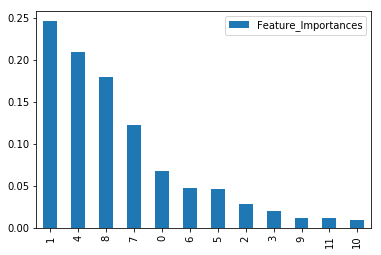

In [102]:
Importance.plot.bar()

In [105]:
data1=[X_train,X_test]

for data in data1:
    data.drop(['Embarked_Q','Embarked_S','Embarked_C','Parch'],axis=1,inplace=True)

In [106]:
X_train.head()

,Pclass,Age,SibSp,Fare,Deck,Family_size,Sex_female,Sex_male
PassengerId,,,,,,,,
1,3,22.0,1,7.2500,8.0,1,0,1
2,1,38.0,1,71.2833,3.0,1,1,0
3,3,26.0,0,7.9250,8.0,0,1,0
4,1,35.0,1,53.1000,3.0,1,1,0
5,3,35.0,0,8.0500,8.0,0,0,1


In [107]:
X_test.head()

,Pclass,Age,SibSp,Fare,Deck,Family_size,Sex_female,Sex_male
PassengerId,,,,,,,,
892,3,34.5,0,7.8292,8.0,0,0,1
893,3,47.0,1,7.0000,8.0,1,1,0
894,2,62.0,0,9.6875,8.0,0,0,1
895,3,27.0,0,8.6625,8.0,0,0,1
896,3,22.0,1,12.2875,8.0,2,1,0


In [108]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
y_pred_train = rfc.predict(X_train)

In [110]:
print("The accuracy score came out to be on train : {}".format(metrics.accuracy_score(y_train,y_pred_train)))
print("The precision score came out to be on train : {}".format(metrics.precision_score(y_train,y_pred_train)))
print("The recall score came out to be on train : {}".format(metrics.recall_score(y_train,y_pred_train)))

The accuracy score came out to be on train : 0.9685393258426966
The precision score came out to be on train : 0.9786585365853658
The recall score came out to be on train : 0.9385964912280702


In [111]:
y_pred_test = rfc.predict(X_test)

In [112]:
print("The accuracy score came out to be on test : {}".format(metrics.accuracy_score(y_test,y_pred_test)))
print("The precision score came out to be on test : {}".format(metrics.precision_score(y_test,y_pred_test)))
print("The recall score came out to be on test : {}".format(metrics.recall_score(y_test,y_pred_test)))

The accuracy score came out to be on test : 0.8301435406698564
The precision score came out to be on test : 0.7612903225806451
The recall score came out to be on test : 0.7763157894736842


In [115]:
submission = pd.DataFrame({"PassengerId": X_test.index,"Survived": y_pred_test})
submission.to_csv('submission.csv', index=False)